## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta, expon

Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [2]:
def sample_cards(N, n, k, replace=False):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=replace)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [3]:
cards = sample_cards(100, 6, 3)
cards

array([[ 19,  71,  72],
       [  4,  57,  84],
       [ 23,  73,  78],
       [  9,  60,  77],
       [ 35,  56,  91],
       [ 62,  64, 100]])

and access the cards of each player with 

In [4]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([19, 71, 72]), array([ 4, 57, 84]))

The lowest card in the game is

In [5]:
np.min(cards)

4

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

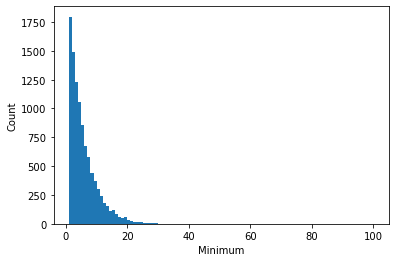

In [6]:
# To Do cell
np.random.seed(10)
sims = 10000
mins = np.zeros(sims)

for i in range(sims):
    cards = sample_cards(100, 6, 3)
    mins[i] = np.min(cards)

plt.hist(mins, bins = np.arange(1,101))
plt.xlabel("Minimum")
plt.ylabel('Count')
plt.show()


### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

In [7]:
def get_max_gap(cards):
    cards = np.sort(cards)

    biggest_gap = 0
    for i in range(len(cards)):
        if i == len(cards)-1: continue
        gap = cards[i+1] - cards[i]
        if gap > biggest_gap: biggest_gap = gap
    
    return biggest_gap

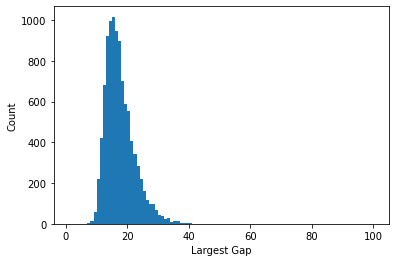

17.0574

In [8]:
# To Do cell
np.random.seed(11)
sims = 10000
gaps = np.zeros(sims)

for i in range(sims):
    cards = sample_cards(100, 6, 3)
    gaps[i] = get_max_gap(cards.flatten())

plt.hist(gaps, bins = np.arange(1,101))
plt.xlabel('Largest Gap')
plt.ylabel('Count')
plt.show()
np.mean(gaps)


In [9]:
def calculate_different_gaps(cards, n_cards):
    # sort, keep track of whose card is who, get biggest gap that meets condition of  being from different players
    sorted_indices = np.argsort(cards.flatten())
    sorted_cards = cards.flatten()[sorted_indices]
    
    max_gap = 0

    for i in range(len(sorted_cards) -1):
        first_card_group = np.floor(sorted_indices[i] / n_cards)
        second_card_group = np.floor(sorted_indices[i + 1] / n_cards)

        if first_card_group == second_card_group: continue

        gap = np.abs(sorted_cards[i+1] - sorted_cards[i])
        if gap > max_gap: max_gap = gap
    return max_gap
        

In [10]:
cards = sample_cards(100, 6, 1)
calculate_different_gaps(cards, 1)

27

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

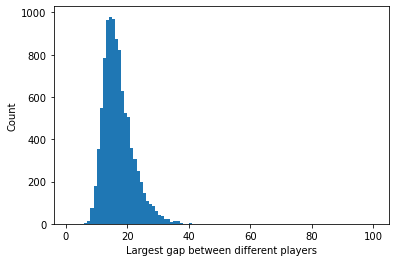

16.4839

In [11]:
# To Do cell
np.random.seed(11)
sims = 10000
gaps = []
n_cards = 3
n_players = 6
for i in range(sims):
    cards = sample_cards(100, n_players, n_cards)
    gaps.append(calculate_different_gaps(cards, n_cards))

plt.hist(gaps, bins = np.arange(1,101))
plt.xlabel('Largest gap between different players')
plt.ylabel('Count')
plt.show()
np.mean(gaps)

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

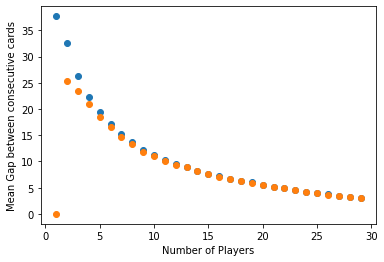

In [12]:
# To Do cell
mean_same = []
mean_dif = []
np.random.seed(10)

sims=1000
n_cards = 3
# vary n
for n_players in range(1, 30):
    gaps_diff = []
    gaps_same = []
    for i in range(sims):
        cards = sample_cards(100, n_players, n_cards)
        gaps_diff.append(calculate_different_gaps(cards, n_cards))
        gaps_same.append(get_max_gap(cards.flatten()))
    
    mean_same.append(np.mean(gaps_same))
    mean_dif.append(np.mean(gaps_diff))

plt.scatter(range(1,30), mean_same)
plt.scatter(range(1,30), mean_dif)
plt.xlabel('Number of Players')
plt.ylabel('Mean Gap between consecutive cards')
plt.show()


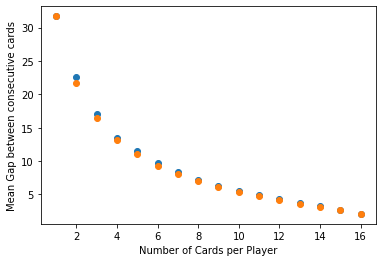

In [13]:
mean_same = []
mean_dif = []
np.random.seed(10)

sims=1000
n_players = 6
# vary n_cards
for n_cards in range(1, 17):
    gaps_diff = []
    gaps_same = []
    for i in range(sims):
        cards = sample_cards(100, n_players, n_cards)
        gaps_diff.append(calculate_different_gaps(cards, n_cards))
        gaps_same.append(get_max_gap(cards.flatten()))
    
    mean_same.append(np.mean(gaps_same))
    mean_dif.append(np.mean(gaps_diff))

plt.scatter(range(1,17), mean_same)
plt.scatter(range(1,17), mean_dif)
plt.xlabel('Number of Cards per Player')
plt.ylabel('Mean Gap between consecutive cards')
plt.show()

The Orange dots are the mean gaps between consecutive cards from different players and the blue dots are the mean gaps between consecutive cards not worrying about players. As you increase the number of players or increase the number of cards per player, the mean gap size goes down. The average gap size between different players is most different from the average gap size between any card at lower numbers of players and cards per player. At these lower numbers of cards per player and players, the gap size between cards of different players is generally smaller than the gap size between any two cards.

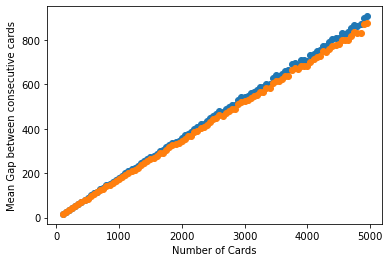

In [14]:
# vary N
mean_same = []
mean_dif = []
np.random.seed(10)

sims=1000
n_cards = 3
n_players = 6
# vary n
for N in range(100, 5000, 50):
    gaps_diff = []
    gaps_same = []
    for i in range(sims):
        cards = sample_cards(N, n_players, n_cards)
        gaps_diff.append(calculate_different_gaps(cards, n_cards))
        gaps_same.append(get_max_gap(cards.flatten()))
    
    mean_same.append(np.mean(gaps_same))
    mean_dif.append(np.mean(gaps_diff))

plt.scatter(range(100, 5000, 50), mean_same)
plt.scatter(range(100, 5000, 50), mean_dif)
plt.xlabel('Number of Cards')
plt.ylabel('Mean Gap between consecutive cards')
plt.show()

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

I am generating a binomial random variable by counting how many cards in a game are less than or equal to 30.

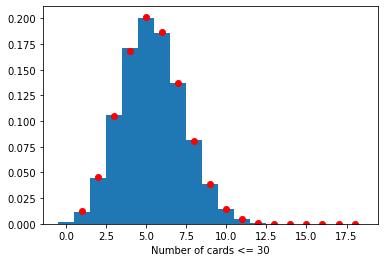

In [15]:
# To Do cell
# only works exactly if there is replacement
N = 100
n = 6
k = 3
sims = 50000

x = 30

sums = []
for i in range(sims):
    cards = sample_cards(N, n, k, replace=True).flatten()
    sums.append((cards <= x).sum())

plt.hist(sums, np.arange(0, 18 + 1.5) - 0.5, density=True)
plt.scatter(np.arange(1,19), binom.pmf(np.arange(1,19), 18, .3), c='red')
plt.xlabel('Number of cards <= 30')
plt.show()

We see excellent fit between the binomial pdf and the simulated data.

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

(0.0, 100.0)

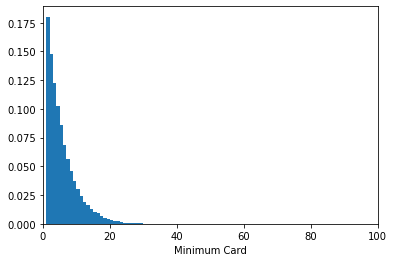

In [16]:
# To Do cell
np.random.seed(10)
sims = 50000
mins = np.zeros(sims)

for i in range(sims):
    cards = sample_cards(100, 6, 3)
    mins[i] = np.min(cards)
    #mins[i] = np.sort(cards.flatten())[1]

plt.hist(mins, density=True, bins=np.arange(0,101))
plt.xlabel('Minimum Card')
#plt.plot(np.arange(1,102, step=1), beta.pdf(np.arange(0,1.01, step=.01),1, 18+1-1), c='red')
#plt.ylim([0,2.5])
plt.xlim([0,100])

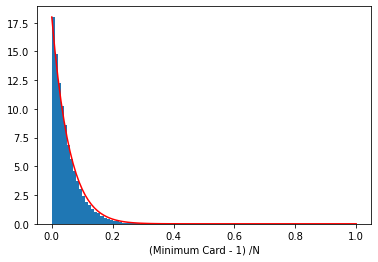

In [17]:
plt.plot(np.arange(0,1.01, step=.01), beta.pdf(np.arange(0,1.01, step=.01),1, 18+1-1), c='red')
plt.hist((mins-1)/100, density=True, bins=np.arange(0,1.01, step=.01))
plt.xlabel('(Minimum Card - 1) /N')
plt.show()

I normalized the minimums from the game to have range [0,1] in order to compare with the beta distribution PDF. Overall, the beta distribution fits our observed distribution of minimums pretty well.

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

Text(0.5, 0, 'Transformed Minimum Card')

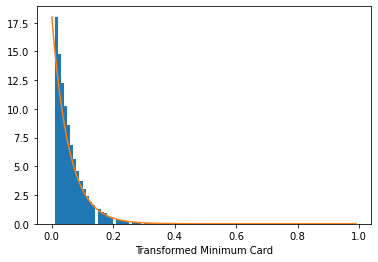

In [18]:
X = -(np.log(1-(mins/100)))
plt.hist(X, density=True, bins=np.arange(0,1, step=.01))
plt.plot(np.arange(0,1,step=.01), expon.pdf(np.arange(0,1,step=.01), scale=1/18))
plt.xlabel('Transformed Minimum Card')

Again, we see pretty good fit between our transformed observed data and the exponential random variable.

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

For Binomial:


N=100


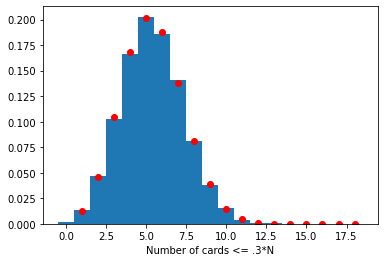

N=400


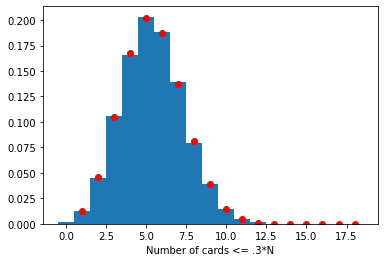

N=800


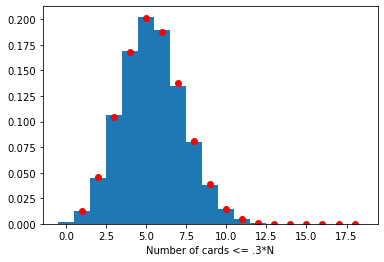

N=1500


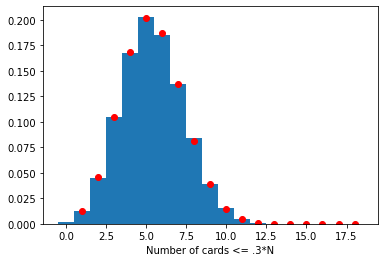

In [19]:
# To Do cell
#N = 100
n = 6
k = 3
sims = 50000

for N in [100, 400, 800, 1500]:
    print('N=' + str(N))
    x = .3*N
    sums = []
    for i in range(sims):
        cards = sample_cards(N, n, k, replace=True).flatten()
        sums.append((cards <= x).sum())

    plt.hist(sums, np.arange(0, 18 + 1.5) - 0.5, density=True)
    plt.scatter(np.arange(1,19), binom.pmf(np.arange(1,19), 18, .3), c='red')
    plt.xlabel('Number of cards <= .3*N')
    plt.show()

N=100


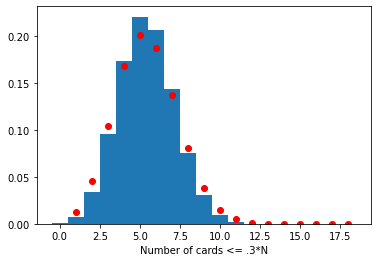

N=400


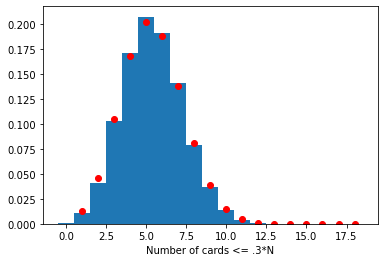

N=800


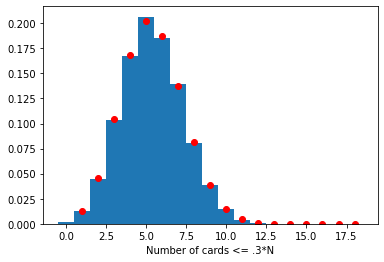

N=1500


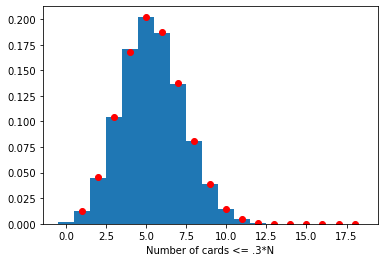

In [20]:
n = 6
k = 3
sims = 50000

for N in [100, 400, 800, 1500]:
    print('N=' + str(N))
    x = .3*N
    sums = []
    for i in range(sims):
        cards = sample_cards(N, n, k, replace=False).flatten()
        sums.append((cards <= x).sum())

    plt.hist(sums, np.arange(0, 18 + 1.5) - 0.5, density=True)
    plt.scatter(np.arange(1,19), binom.pmf(np.arange(1,19), 18, .3), c='red')
    plt.xlabel('Number of cards <= .3*N')
    plt.show()

For binomial with replacement=True, there is no change as N increases because the binomial distribution is exact. With replacement=False, the binomial distribution has better fit when N increases. This makes sense N is larger, there is less chance of sampling the same card twice even with replacement is true. This upholds the iid nature of bernoulli trials in a binomial distribution.

Beta Distribution:

N=100


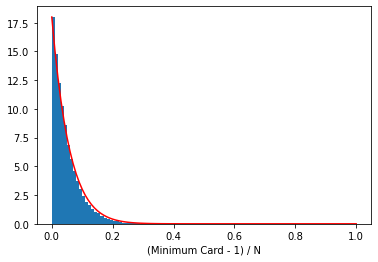

N=400


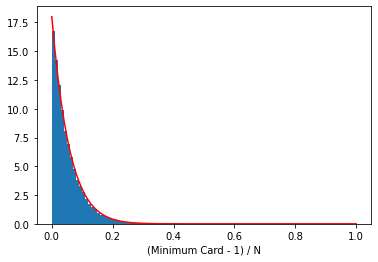

N=800


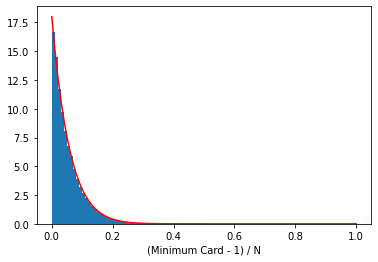

N=1500


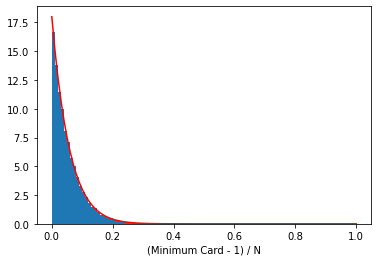

In [21]:
np.random.seed(10)

for N in [100, 400, 800, 1500]:
    sims = 50000
    mins = np.zeros(sims)
    print('N=' + str(N))
    for i in range(sims):
        cards = sample_cards(N, 6, 3)
        mins[i] = np.min(cards)
        #mins[i] = np.sort(cards.flatten())[1]

    plt.plot(np.arange(0,1.01, step=.01), beta.pdf(np.arange(0,1.01, step=.01),1, 18+1-1), c='red')
    plt.hist((mins-1)/N, density=True, bins=np.arange(0,1.01, step=.01))
    plt.xlabel('(Minimum Card - 1) / N')
    plt.show()

As N increases, the fit of beta distribution becomes even better.

Exponential Distribution:

N=100


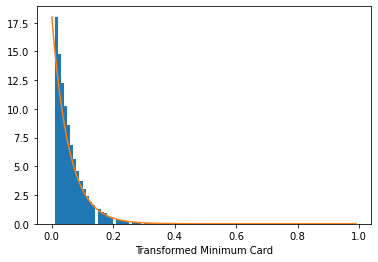

N=400


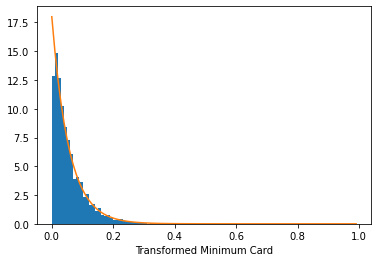

N=800


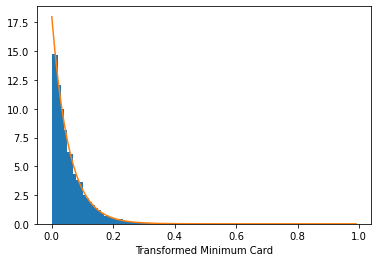

N=1500


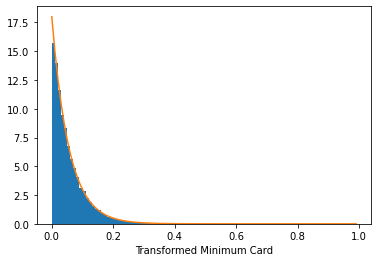

In [22]:
np.random.seed(10)

for N in [100, 400, 800, 1500]:
    print('N=' + str(N))
    sims = 50000
    mins = np.zeros(sims)

    for i in range(sims):
        cards = sample_cards(N, 6, 3, replace=False)
        mins[i] = np.min(cards)
        #mins[i] = np.sort(cards.flatten())[1]

    X = -(np.log(1-(mins/N)))
    plt.hist(X, density=True, bins=np.arange(0,1, step=.01))
    plt.plot(np.arange(0,1,step=.01), expon.pdf(np.arange(0,1,step=.01), scale=1/18))
    plt.xlabel('Transformed Minimum Card')
    plt.show()

The fit of the exponential distribution impproves as N becomes much larger than n*k

Text(0, 0.5, 'Mean of Minimum Card / N')

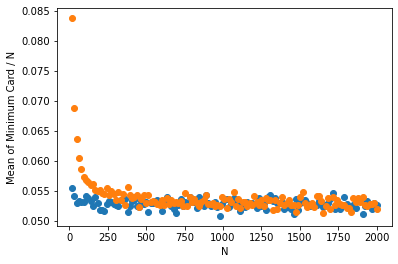

In [23]:
# comparing with replacement and without as N increases
# different between with and without replacement
# comparing fit of exponential with and without replacement
np.random.seed(10)
Ns = range(19,2000, 15)

mins_mean = np.zeros(len(Ns))
mins_mean_replace = np.zeros(len(Ns))
#beta_mean =  np.mean(beta.rvs(1, 18+1-1, size=5000))
for j, N in enumerate(Ns):
    sims = 5000
    mins = np.zeros(sims)

    #without replacemnt
    for i in range(sims):
        cards = sample_cards(N, 6, 3)
        mins[i] = np.min(cards)
        #mins[i] = np.sort(cards.flatten())[1]

    mins_replace = np.zeros(sims)
    #with replacemnt
    for i in range(sims):
        cards = sample_cards(N, 6, 3, replace=True)
        mins_replace[i] = np.min(cards)

    #beta_mean =  np.mean(beta.rvs(1, 18+1-1, sims))
    mins_mean[j] = np.mean(mins/N)
    mins_mean_replace[j] = np.mean(mins_replace/N)

plt.scatter(Ns, mins_mean)
plt.scatter(Ns, mins_mean_replace)
plt.xlabel('N')
plt.ylabel('Mean of Minimum Card / N')

Text(0, 0.5, 'Mean of Transformed Minimum Card')

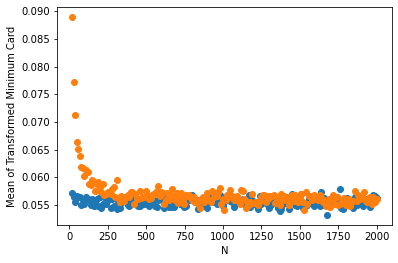

In [24]:
# different between with and without replacement
# comparing fit of exponential with and without replacement
np.random.seed(10)
Ns = range(19,2000, 10)

mins_mean = np.zeros(len(Ns))
mins_mean_replace = np.zeros(len(Ns))
#beta_mean =  np.mean(beta.rvs(1, 18+1-1, size=5000))
for j, N in enumerate(Ns):
    sims = 5000
    mins = np.zeros(sims)

    #without replacemnt
    for i in range(sims):
        cards = sample_cards(N, 6, 3)
        mins[i] = np.min(cards)
        #mins[i] = np.sort(cards.flatten())[1]

    mins_replace = np.zeros(sims)
    #with replacemnt
    for i in range(sims):
        cards = sample_cards(N, 6, 3, replace=True)
        mins_replace[i] = np.min(cards)

    #beta_mean =  np.mean(beta.rvs(1, 18+1-1, sims))
    mins_mean[j] = np.mean(-(np.log(1-(mins/N))))
    mins_mean_replace[j] = np.mean(-(np.log(1-(mins_replace/N))))

plt.scatter(Ns, mins_mean)
plt.scatter(Ns, mins_mean_replace)
plt.xlabel('N')
plt.ylabel('Mean of Transformed Minimum Card')

Orange is with replacement, blue without replacement for both. We see with replacment have higher minimum card as proportion of N with lower values of N. As N increases, with and without replacement become very similar.

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: Daniel Lewinsohn (lewinsohndp)
- Member No2: Rebecca Eliscu (Reliscu)
- Member No3: Jules Perez (jpere104)